# Boundary-value Problems: second-order ODE

To solve a first order ODE, one constraint is needed (initial value problem,, IVP). In the case of a second order ODE, two constraints are needed. **If the constraints are defined at different locations of the domain, then you will be dealing with a Boundary-value problem (BVP)**. See the following examples:

$$
\frac{dp}{dt} = -p^{3/2} + 5*p_{cst}(1-e^{-t}) \text{ first order ODE -> IVP with 1 constraints }  p[0] = 1000 
$$

$$
\frac{d^2y}{dt^2} = \frac{dy}{dt} -y + \cos t =0 \text{ second order ODE -> IVP with 2 constraints }  y[0] = 2 \text{ and } \left. \frac{dy}{dt} \right|_{t=0} = 5
$$

$$
\frac{d^2T}{dx^2}-\alpha_1(T-T_s) =0 \text{ second order ODE -> BVP with 2 constraints }  T[0] = 10 \text{ and }T[-1] = 20
$$

Even for higher ODE orders, the number of constrains required corresponds to the order of the ODE. It is clear that a second order ODE can either be an IVP or a BVP. The former case is common when describing time derivatives and the latter case is common when describing space derivatives. From now on, we focus on BVP. 

## Boundary Conditions

A second order ODE BVP of the type:

$$
\frac{d^2y}{dx^2} = g(x,y,\frac{dy}{dx})
$$

with a domain solution $a<=x<=b$ and boundary conditions (or constraints) defined at $a$ and $b$ typically has two types of boundary conditions: 

 - Dirichlet boundary conditions 
$$
y(x=a) = Y_a \text{ and } y(x=b) = Y_b
$$
 - Neumann boundary conditions
$$
\left. \frac{dy}{dx} \right|_{x=a} = D_a \text{ and } \left. \frac{dy}{dx} \right|_{x=b} = D_b
$$

Of course, a combination of BC can also exist. 

Consider the following equation that describes the deformation $y$ of a beam with length $L$ clamped at $x=0$ and $x=L$:

$$
\frac{d^4y}{dx^4}=\alpha \text{ load}(x) 
$$

where $\alpha$ represents the beams material characteristics.

As it is and ODE of fourth order, it needs 4 BCs. The nature of the problem states that the **deformation** and the **slope of the deformation** at the ends is 0, thus, two Dirichlet and two Neumann BCs:  

$$
y(0)=0; \left. \frac{dy}{dx} \right|_{x=0}=0;  y(L)=0; \left. \frac{dy}{dx} \right|_{x=L}=0; 
$$

## Solving a BVP using Finite Differences

Just like in the initial value problem section, here the derivatives are approximated numerically following a desired method and order of accuracy. Now the domain going from $a$ to $b$ is discretized using a determined number of grid points $n$ and, thus, a number of subintervals $N$. There is always one more point than subintervals, $n=N+1$. This is the grid (see Figure below) and, if the spacing is regular, then the length of the subinterval is $\Delta x = (b-a)/N$. 

<img src="figs/1d_grid.png" width=450px></img>

The Boundary Conditions are defined at the end points and the discretization is applied at **almost** every point. This depends on the numerical approximation. The following steps are followed to solve a BVP:

1.- Discretization of the differential equation with a numerical approximation of choice

2.- Parameter definition

3.- Grid creation

4.- Define Boundary conditions 

5.- Building a system of equations according to the discretization: $Ay=b$

6.- Solving the system

Let's consider the following problem:

[473.         424.41170796 384.58419644 350.86229802 320.99788614
 293.        ]


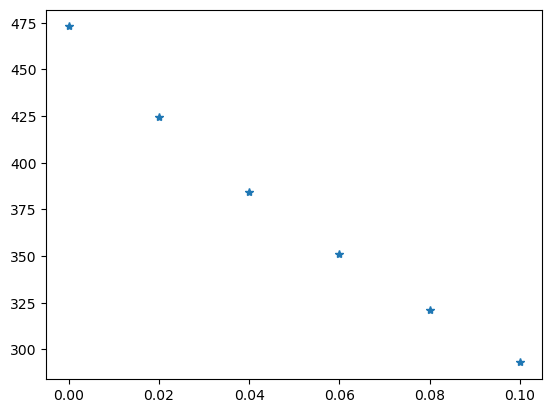

In [50]:
import numpy as np 
import matplotlib.pyplot as plt


hc = 40
P = 0.016
k = 240
Ac = 1.6e-5
h=0.02
Ts = 293
beta = hc*P/(k*Ac)
matrix_element = -(2+h**2*beta)
b_element = -h**2*beta*Ts

# grid creation
x = np.arange(0,0.1+h,h)
T = np.zeros(x.shape)

# boundary conditions
T[0] = 473
T[-1] = 293

# Building matrix A
A = np.zeros((len(x)-2,len(x)-2))
np.fill_diagonal(A, matrix_element)
A[np.arange(3), np.arange(1, 4)] = 1  # Upper diagonal
A[np.arange(1, 4), np.arange(3)] = 1  # Lower diagonal

b = np.array([ b_element - T[0] , b_element, b_element,  b_element - T[-1]])


A_inv = np.linalg.inv(A)
T[1:-1] = A_inv @ b

print(T)
plt.plot(x,T,'*')

[473.         419.39498433 377.78996865 344.61128527 317.08526646
 293.        ]


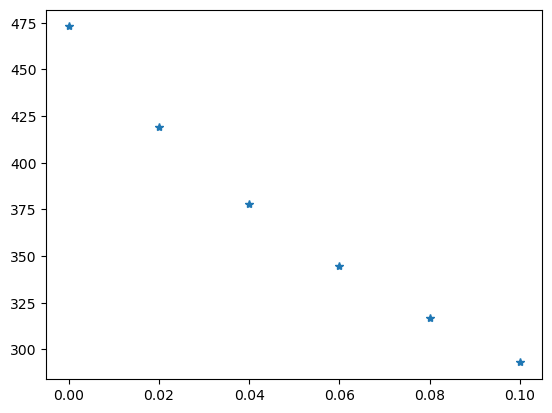

In [49]:
import numpy as np 
import matplotlib.pyplot as plt


hc = 40
P = 0.016
k = 240
Ac = 1.6e-5
h=0.02
Ts = 293
x = np.arange(0,0.1+h,h)
beta = hc*P/(k*Ac)
matrix_element = 1-beta*h**2
b_element = -beta*Ts*h**2

T = np.zeros(x.shape)
T[0] = 473
T[-1] = 293

A = np.zeros((len(x)-2,len(x)-2))

np.fill_diagonal(A, -2)
A[np.arange(3), np.arange(1, 4)] = 1  # Upper diagonal
A[np.arange(1, 4), np.arange(3)] = matrix_element  # Lower diagonal


b = np.array([ b_element - matrix_element * T[0] , b_element, b_element,  b_element - T[-1]])
#print(A,'\n\n\n',b,'\n\n\n')
#print(A\b')

A_inv = np.linalg.inv(A)

# Step 2: Multiply the inverse of A by vector b
#T[1:-1] = np.dot(A_inv, b)
T[1:-1] = A_inv @ b
#T[1:-1] = np.linalg.solve(A,b)

print(T)

plt.plot(x,T,'*')